# Analyzing comments on the SDS YouTube podcast. 

# Introduction

This project focuses on analyzing the sentiment of YouTube comments using the YouTube API and Natural Language Processing (NLP) -_ techniques. The process involves gathering comments from selected YouTube videos, preprocessing the data, training sentiment analysis models, and deploying them in a web application for real-time analysis.

The YouTube comments are collected via the YouTube API and categorized into positive, negative, or neutral sentiments using a machine learning model from Huggingface. An ETL pipeline, powered by Apache Airflow, automates the extraction, transformation, and storage of the data. Finally, the trained model is deployed on platforms like Streamlit or Huggingface Spaces for easy access and use. I chose to analyze the SDS YouTube podcast, [Watch Here](https://www.youtube.com/@SuperDataScienceWithJonKrohn)

# Business Statement

Company XYZ, an entertainment business, is focused on improving customer retention and gaining a deeper understanding of audience feedback. To achieve this, they have assigned me the task of developing an automated ETL pipeline that extracts comments from their YouTube videos and stores them in a database. The pipeline will be deployed in production and scheduled to run daily, ensuring new comments are fetched consistently. The goal is to leverage these comments for sentiment analysis, offering valuable insights into customer satisfaction and identifying actionable strategies to enhance the overall experience

# ETL Pipeline Automation

  Watch  the ETL Pipeline Automation [Watch Here](https://www.linkedin.com/posts/patrickedosoma_etl-dataengineering-postgresql-activity-7288207522610475009-7Kty?utm_source=share&utm_medium=member_desktop)

In [2]:

import pandas as pd

In [3]:

df = pd.read_excel(r'/content/SDS_youtube_comments.xls')


In [4]:
df

,comments
0,#GLENNMCDONALD we miss ya❤🤘
1,It's sort of like word embedding but where all...
2,Spotify recommendations are so awful it truly ...
3,"Interesting, I was considering doing a master ..."
4,Thanks a lot for the insight from your guest. ...
...,...
134,I think it may be because papers on this is sp...
135,"Interesting, and a brilliant guest."
136,😍❤❤❤❤❤
137,The research scientist trajectory is spot on.


In [5]:
df['comments'][0]

'#GLENNMCDONALD we miss ya❤🤘'

In [6]:
df['comments'][1]

"It's sort of like word embedding but where all the context of the song is taken from what users listened to"

In [7]:
df.isna().sum()

,0
comments,6


In [8]:
df['comments'].str.isspace().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  133 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB


In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.base import BaseEstimator, TransformerMixin

In [10]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
##  Creating the preprocessing function

class TextProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, lower=False, stem=False):
        self.lower = lower
        self.stem = stem

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        def text_processing(text):
            if not isinstance(text, str):
                text = ""

            processed_text = re.sub('[^a-zA-Z]', ' ', text)
            if self.lower:
                processed_text = processed_text.lower()
            processed_text = processed_text.split()
            if self.stem:
                ps = PorterStemmer()
                stop_words = set(stopwords.words('english'))
                processed_text = [ps.stem(word) for word in processed_text if word not in stop_words]
            return ' '.join(processed_text)

        return [text_processing(text) for text in X]


In [12]:
text_processor = TextProcessor(lower=True, stem=True)

In [13]:
df["comments"] = df["comments"].astype(str)  # Convert all values to strings
df["processed_comments"] = text_processor.fit_transform(df["comments"])


In [14]:
df

,comments,processed_comments
0,#GLENNMCDONALD we miss ya❤🤘,glennmcdonald miss ya
1,It's sort of like word embedding but where all...,sort like word embed context song taken user l...
2,Spotify recommendations are so awful it truly ...,spotifi recommend aw truli boggl mind feed lit...
3,"Interesting, I was considering doing a master ...",interest consid master thesi recommend system ...
4,Thanks a lot for the insight from your guest. ...,thank lot insight guest abl use quit bit backg...
...,...,...
134,I think it may be because papers on this is sp...,think may paper spars term actual implement se...
135,"Interesting, and a brilliant guest.",interest brilliant guest
136,😍❤❤❤❤❤,
137,The research scientist trajectory is spot on.,research scientist trajectori spot


In [15]:
df['processed_comments'][136]


''

### i discovered empty rows in the processed comments, hence i'll drop those rows

In [16]:

df = df[df["processed_comments"].str.strip() != '']


In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
df

,comments,processed_comments
0,#GLENNMCDONALD we miss ya❤🤘,glennmcdonald miss ya
1,It's sort of like word embedding but where all...,sort like word embed context song taken user l...
2,Spotify recommendations are so awful it truly ...,spotifi recommend aw truli boggl mind feed lit...
3,"Interesting, I was considering doing a master ...",interest consid master thesi recommend system ...
4,Thanks a lot for the insight from your guest. ...,thank lot insight guest abl use quit bit backg...
...,...,...
131,Didn't seem to offer much value other than it'...,seem offer much valu closer biolog great someo...
132,I think it may be because papers on this is sp...,think may paper spars term actual implement se...
133,"Interesting, and a brilliant guest.",interest brilliant guest
134,The research scientist trajectory is spot on.,research scientist trajectori spot


In [19]:
   import transformers

In [20]:
transformers.__version__

'4.48.2'

In [21]:
import torch

In [22]:
torch.__version__

'2.5.1+cu124'

In [23]:
from transformers import pipeline

In [24]:
classifier = pipeline("text-classification", model = "distilbert/distilbert-base-uncased-finetuned-sst-2-english")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [25]:
classifier("This is a great movie")

[{'label': 'POSITIVE', 'score': 0.9998798370361328}]

In [26]:
def score(comments):
  return classifier(comments)[0]['label']

In [27]:
df['sentiment'] = df['processed_comments'].apply(score)

<ipython-input-27-160ed8351e83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['processed_comments'].apply(score)


In [28]:
df

,comments,processed_comments,sentiment
0,#GLENNMCDONALD we miss ya❤🤘,glennmcdonald miss ya,NEGATIVE
1,It's sort of like word embedding but where all...,sort like word embed context song taken user l...,NEGATIVE
2,Spotify recommendations are so awful it truly ...,spotifi recommend aw truli boggl mind feed lit...,NEGATIVE
3,"Interesting, I was considering doing a master ...",interest consid master thesi recommend system ...,NEGATIVE
4,Thanks a lot for the insight from your guest. ...,thank lot insight guest abl use quit bit backg...,POSITIVE
...,...,...,...
131,Didn't seem to offer much value other than it'...,seem offer much valu closer biolog great someo...,NEGATIVE
132,I think it may be because papers on this is sp...,think may paper spars term actual implement se...,NEGATIVE
133,"Interesting, and a brilliant guest.",interest brilliant guest,POSITIVE
134,The research scientist trajectory is spot on.,research scientist trajectori spot,POSITIVE


In [29]:
df['sentiment'].value_counts()

,count
sentiment,
NEGATIVE,74
POSITIVE,62


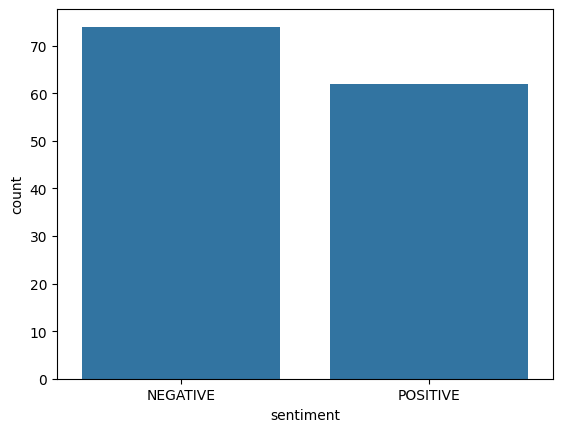

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment', data=df)
plt.show()


In [31]:
# Filtering  rows where sentiment is 'negative'
negative_comments = df[df['sentiment'] == 'NEGATIVE']['comments']



In [32]:
negative_comments_list = negative_comments.tolist()
print(negative_comments_list)


['#GLENNMCDONALD we miss ya❤🤘', "It's sort of like word embedding but where all the context of the song is taken from what users listened to", "Spotify recommendations are so awful it truly boggles the mind. And that's after feeding them literal years of playlists and feedback via 'enhanced' playlist recommendations. I also know this experience happens to more users than it doesn't and even this sparse comments section confirms this. Classic example of optimizing for the wrong metric (whatever that may be). At least now I have a face to direct my disdain at", 'Interesting, I was considering doing a master thesis in recommender systems. One of my motivations being how bad spotify is. Youtube on the other has suggested tons of new music to me I never would have heard otherwise. But maybe Im one of the notorious grey/black sheep that is hard to make suggestions for', 'Small critique:\xa0 Dude, just listen to the guest! You are still writing and doing something with the laptop, and it look

In [1]:
#negative_comments_list

In [34]:
df

,comments,processed_comments,sentiment
0,#GLENNMCDONALD we miss ya❤🤘,glennmcdonald miss ya,NEGATIVE
1,It's sort of like word embedding but where all...,sort like word embed context song taken user l...,NEGATIVE
2,Spotify recommendations are so awful it truly ...,spotifi recommend aw truli boggl mind feed lit...,NEGATIVE
3,"Interesting, I was considering doing a master ...",interest consid master thesi recommend system ...,NEGATIVE
4,Thanks a lot for the insight from your guest. ...,thank lot insight guest abl use quit bit backg...,POSITIVE
...,...,...,...
131,Didn't seem to offer much value other than it'...,seem offer much valu closer biolog great someo...,NEGATIVE
132,I think it may be because papers on this is sp...,think may paper spars term actual implement se...,NEGATIVE
133,"Interesting, and a brilliant guest.",interest brilliant guest,POSITIVE
134,The research scientist trajectory is spot on.,research scientist trajectori spot,POSITIVE


In [40]:
df = df.drop("comments", axis=1)


In [41]:
df

,processed_comments,sentiment
0,glennmcdonald miss ya,NEGATIVE
1,sort like word embed context song taken user l...,NEGATIVE
2,spotifi recommend aw truli boggl mind feed lit...,NEGATIVE
3,interest consid master thesi recommend system ...,NEGATIVE
4,thank lot insight guest abl use quit bit backg...,POSITIVE
...,...,...
131,seem offer much valu closer biolog great someo...,NEGATIVE
132,think may paper spars term actual implement se...,NEGATIVE
133,interest brilliant guest,POSITIVE
134,research scientist trajectori spot,POSITIVE


In [42]:
df.to_csv("processed_comments.csv", index=False)


In [43]:

df = pd.read_csv("processed_comments.csv")

df["sentiment"] = df["sentiment"].map({"POSITIVE": 1, "NEGATIVE": 0})

In [54]:
df

,processed_comments,sentiment
0,glennmcdonald miss ya,0
1,sort like word embed context song taken user l...,0
2,spotifi recommend aw truli boggl mind feed lit...,0
3,interest consid master thesi recommend system ...,0
4,thank lot insight guest abl use quit bit backg...,1
...,...,...
131,seem offer much valu closer biolog great someo...,0
132,think may paper spars term actual implement se...,0
133,interest brilliant guest,1
134,research scientist trajectori spot,1


## INSIGHTS AND RECOMMENDATION

## Based on my analysis of the SDS podcast, I found that there are fewer positive comments overall. However, the DistilBERT model has struggled to detect sarcasm in certain comments, misclassifying them as negative. To address this, I Would have to fine-tune the DistilBERT model to better recognize sarcastic comments as positive. Unfortunately, I’ve only gathered 136 comments, which is insufficient for fine-tuning the model effectively. Below are summaries of most occuring negative comments  which could be improved

## 1. "The guest brought valuable insights to the conversation, although the host’s approach could benefit from further refinement to enhance the overall dynamic."

## 2. "The host took considerable time for their own introduction but did not provide a proper introduction for the interviewer, which could have improved the clarity and flow of the episode."

## 3. "The interview lacked focus in certain areas, with some questions not aligning with the core discussion. Additionally, the introductory segment seemed to focus more on the host's podcast rather than the content at hand."

## 4. "It would be beneficial for podcast hosts to provide more space for their guests to speak, ensuring that the conversation stays balanced and insightful."

## 5. "There were instances where the discussion strayed from the main topic, making it harder to stay engaged with the primary subject matter."

## 6. "The host’s tone and speaking style felt informal, which may not have aligned with the professional nature of the podcast."